# Atmospheric CO2 Concentration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from mod.unique_value import checking_unique_value

In [ ]:
def checking_unique_value(df):
    unique_values = [df[col].nunique() for col in df]
    for col, values in zip(df.columns, unique_values):
        print(f"Unique values in column '{col}': {values}")

In [3]:
atmospheric_CO2_Concentrations_df = pd.read_csv('./Atmospheric_CO2_Concentrations.csv')
atmospheric_CO2_Concentrations_df = pd.DataFrame(atmospheric_CO2_Concentrations_df)
atmospheric_CO2_Concentrations_df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.86


In [4]:
atmospheric_CO2_Concentrations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             1570 non-null   int64  
 1   Country              1570 non-null   object 
 2   ISO2                 0 non-null      float64
 3   ISO3                 1570 non-null   object 
 4   Indicator            1570 non-null   object 
 5   Unit                 1570 non-null   object 
 6   Source               1570 non-null   object 
 7   CTS_Code             1570 non-null   object 
 8   CTS_Name             1570 non-null   object 
 9   CTS_Full_Descriptor  1570 non-null   object 
 10  Date                 1570 non-null   object 
 11  Value                1570 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 147.3+ KB


In [5]:
atmospheric_CO2_Concentrations_df.describe().round(2)

,ObjectId,ISO2,Value
count,1570.00,0.0,1570.00
mean,785.50,NaN,180.72
std,453.36,NaN,180.55
min,1.00,NaN,-0.10
25%,393.25,NaN,0.45
50%,785.50,NaN,313.83
75%,1177.75,NaN,355.07
max,1570.00,NaN,424.00


In [6]:
checking_unique_value(atmospheric_CO2_Concentrations_df)

Unique values in column 'ObjectId': 1570
Unique values in column 'Country': 1
Unique values in column 'ISO2': 0
Unique values in column 'ISO3': 1
Unique values in column 'Indicator': 2
Unique values in column 'Unit': 2
Unique values in column 'Source': 1
Unique values in column 'CTS_Code': 1
Unique values in column 'CTS_Name': 1
Unique values in column 'CTS_Full_Descriptor': 1
Unique values in column 'Date': 791
Unique values in column 'Value': 868


In [7]:
atmospheric_CO2_Concentrations_df['Indicator'].unique()

array(['Monthly Atmospheric Carbon Dioxide Concentrations',
       'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'],
      dtype=object)

In [8]:
atmospheric_CO2_Concentrations_df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Date', 'Value'],
      dtype='object')

In [9]:
columns_to_drop = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']

In [10]:
df = atmospheric_CO2_Concentrations_df.drop(columns=columns_to_drop, axis='columns')
df

,Date,Value
0,1958M03,315.70
1,1958M04,317.45
2,1958M05,317.51
3,1958M06,317.24
4,1958M07,315.86
...,...,...
1565,2023M11,0.72
1566,2023M12,421.86
1567,2023M12,0.68
1568,2024M01,0.68


# On identifie les valeurs manquantes

In [11]:
blank_counts = df.isnull().sum()
blank_counts.sum()

0

# On identifie les valeurs aberrantes

<Axes: xlabel='Date', ylabel='Value'>

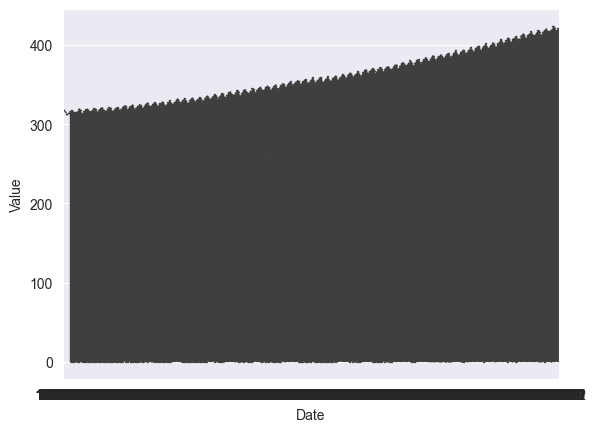

In [12]:
sns.boxplot(df, x='Date', y='Value')

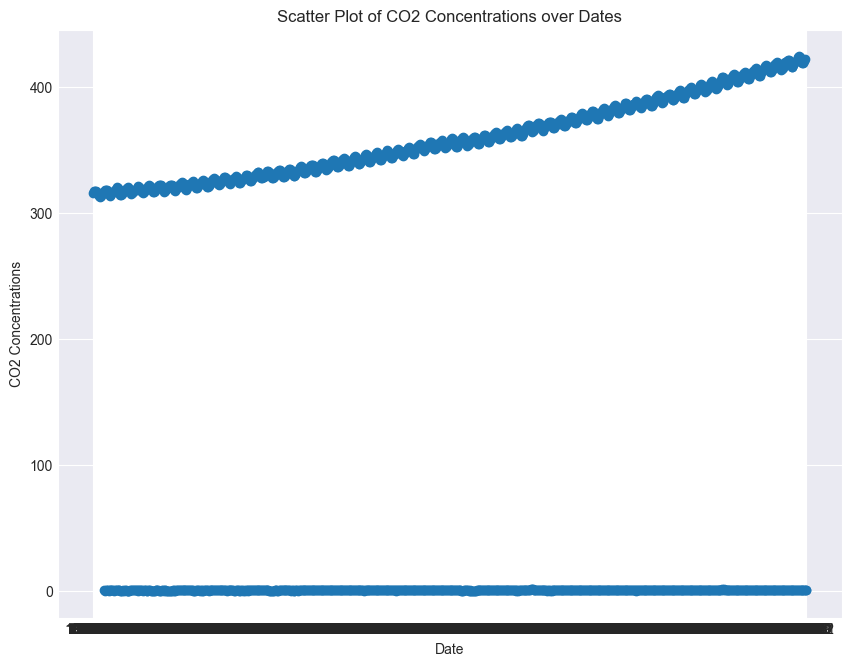

In [13]:
plt.style.use('_mpl-gallery')

x = df['Date']
y = df['Value']

# Plot
plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('CO2 Concentrations')
plt.title('Scatter Plot of CO2 Concentrations over Dates')
plt.grid(True)  # Add gridlines if needed
plt.show()

##### On observe que régulièrement deux valeurs sont prélevées à la même date. Parmis ces deux valeurs, une correspond à la concentration par mois de CO2 dans l'air en part par million de particules et l'autre correspond à la concentration par mois de C02 dans l'air en pourcentage. 

In [14]:
values_to_drop = np.where(df['Value'] < 2)
#values_to_drop[0] correspond aux valeurs à supprimer de la colonne Value.
CO2_concentration_part_per_million_df = df.drop(values_to_drop[0])
CO2_concentration_part_per_million_df

,Date,Value
0,1958M03,315.70
1,1958M04,317.45
2,1958M05,317.51
3,1958M06,317.24
4,1958M07,315.86
...,...,...
1558,2023M08,419.68
1560,2023M09,418.51
1562,2023M10,418.82
1564,2023M11,420.46


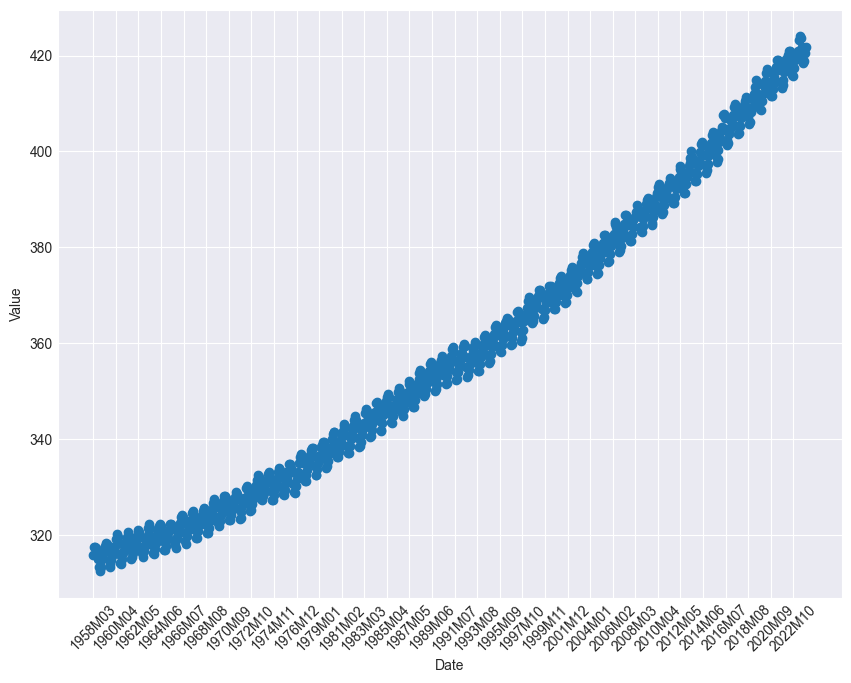

In [15]:
# Scatter plot
fig, ax_CO2_concentration_part_per_million = plt.subplots(figsize=(8, 6))
ax_CO2_concentration_part_per_million.scatter(CO2_concentration_part_per_million_df['Date'], CO2_concentration_part_per_million_df['Value'])
ax_CO2_concentration_part_per_million.set_xlabel('Date')
ax_CO2_concentration_part_per_million.set_ylabel('Value')
plt.xticks(CO2_concentration_part_per_million_df['Date'][::25], rotation=45)
plt.show()

In [16]:
threshold = 2
count_under_threshold = (df['Value'] < threshold).sum()
total_values = len(df)
percentage_under_threshold = (count_under_threshold / total_values) * 100
percentage_under_threshold

49.681528662420384

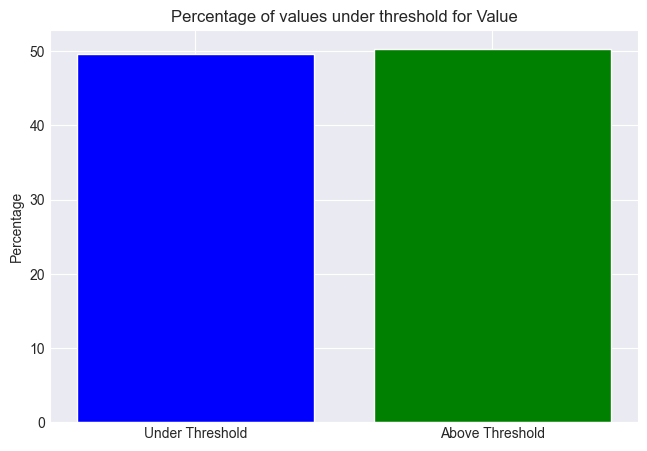

In [17]:
 #Plotting the percentage in a bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.bar(['Under Threshold', 'Above Threshold'], [percentage_under_threshold, 100 - percentage_under_threshold], color=['blue', 'green'])
plt.ylabel('Percentage')
plt.title(f'Percentage of values under threshold for {df["Value"].name}')  # Corrected title formatting
plt.show()

In [18]:
CO2_concentration_part_per_million_df['Year'] = CO2_concentration_part_per_million_df['Date'].str[:4] #Création de la colonne 'Year'
grouped_CO2_concentration_part_per_million_data = CO2_concentration_part_per_million_df.groupby('Year')['Value'].mean() #Regroupement des valeurs moyennes de concentrations de CO2 par année. 
grouped_CO2_concentration_part_per_million_data

Year
1958    315.232000
1959    315.980833
1960    316.910000
1961    317.644167
1962    318.454167
           ...    
2019    411.649167
2020    414.210833
2021    416.413333
2022    418.528333
2023    421.079167
Name: Value, Length: 66, dtype: float64

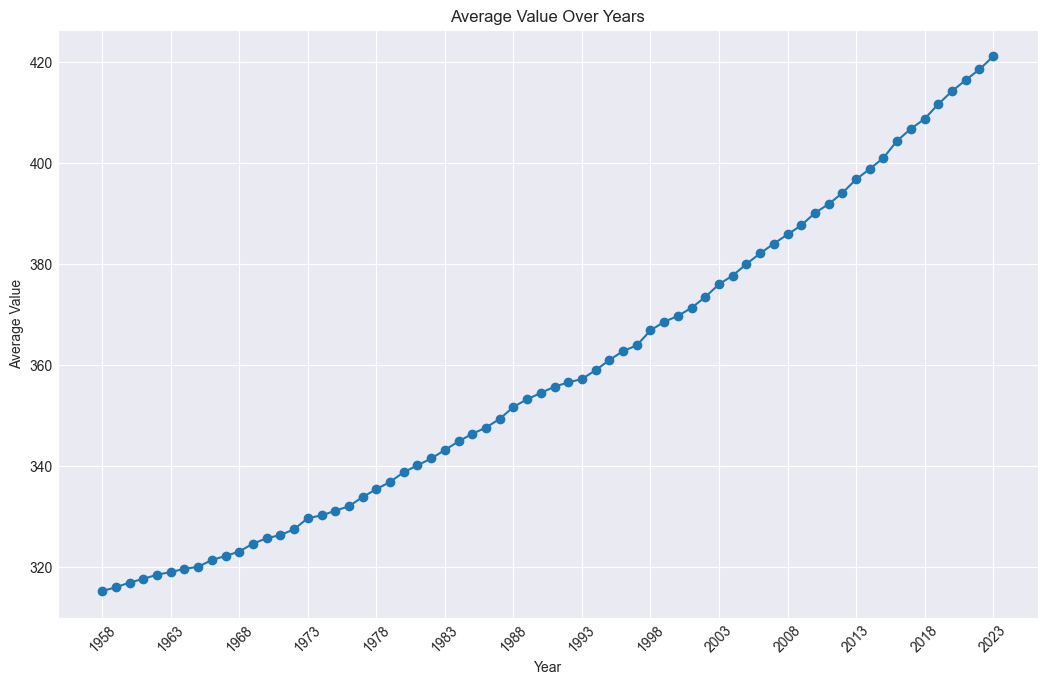

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_CO2_concentration_part_per_million_data.index, grouped_CO2_concentration_part_per_million_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_CO2_concentration_part_per_million_data.index[::5], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

##### La concentration de CO2 est croissante depuis les années 1958 et semble suivre une fonction linéaire. Ceci correspond à une tendance globale et mondiale mais qu'en est-t-il des tendances par pays ?

In [20]:
values_to_drop = np.where(df['Value'] > 2)
#values_to_drop[0] correspond aux valeurs à supprimer de la colonne Value.
CO2_concentration_percent_df = df.drop(values_to_drop[0])
CO2_concentration_percent_df

,Date,Value
13,1959M03,0.30
15,1959M04,0.09
17,1959M05,0.25
19,1959M06,0.29
21,1959M07,0.22
...,...,...
1563,2023M10,0.74
1565,2023M11,0.72
1567,2023M12,0.68
1568,2024M01,0.68


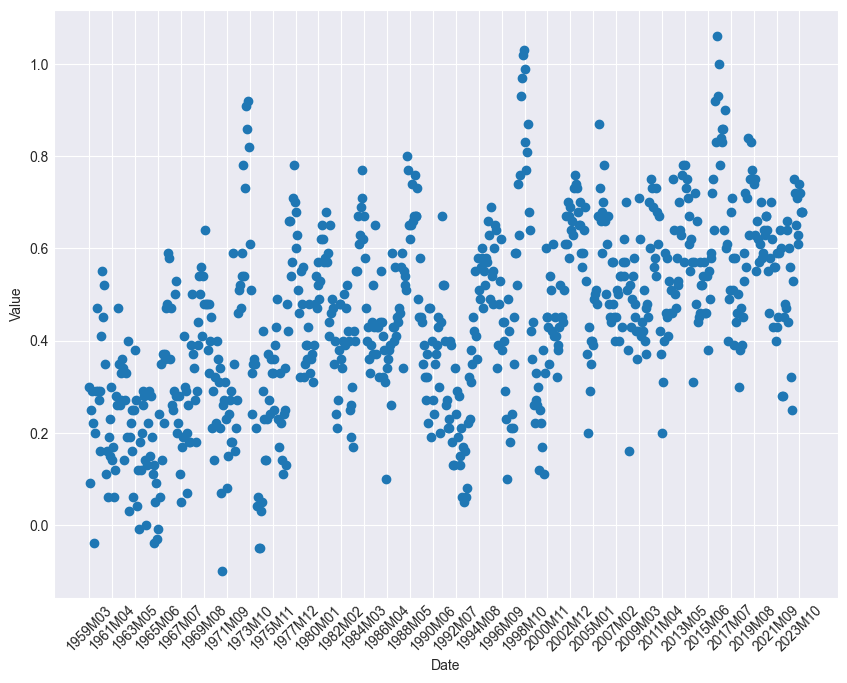

In [21]:
# Scatter plot
fig, ax_CO2_concentration_percent = plt.subplots(figsize=(8, 6))
ax_CO2_concentration_percent.scatter(CO2_concentration_percent_df['Date'], CO2_concentration_percent_df['Value'])
ax_CO2_concentration_percent.set_xlabel('Date')
ax_CO2_concentration_percent.set_ylabel('Value')
plt.xticks(CO2_concentration_percent_df['Date'][::25], rotation=45)
plt.show()

In [22]:
CO2_concentration_percent_df['Year'] = CO2_concentration_percent_df['Date'].str[:4] #Création de la colonne 'Year'
grouped_CO2_concentration_percent_data = CO2_concentration_percent_df.groupby('Year')['Value'].mean() #Regroupement des valeurs moyennes de concentrations de CO2 par année. 
grouped_CO2_concentration_percent_data

Year
1959    0.236000
1960    0.293333
1961    0.232500
1962    0.255833
1963    0.168333
          ...   
2020    0.622500
2021    0.530833
2022    0.508333
2023    0.609167
2024    0.680000
Name: Value, Length: 66, dtype: float64

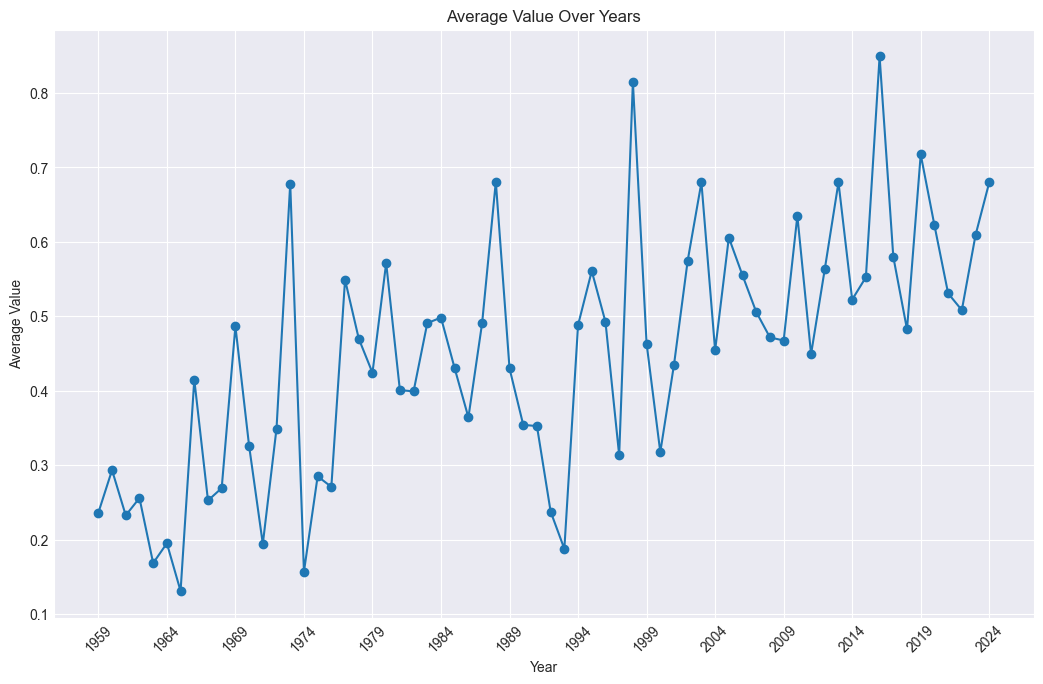

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_CO2_concentration_percent_data.index, grouped_CO2_concentration_percent_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_CO2_concentration_percent_data.index[::5], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

In [24]:
CO2_by_country_df = pd.concat([atmospheric_CO2_Concentrations_df['Country'], atmospheric_CO2_Concentrations_df['Date'], atmospheric_CO2_Concentrations_df['Value']], axis=1)

In [25]:
CO2_by_country_df.nunique()

Country      1
Date       791
Value      868
dtype: int64

##### Nous n'avons pour le moment pas de données par pays. 

In [26]:
CO2_by_country_df['Country']

0       World
1       World
2       World
3       World
4       World
        ...  
1565    World
1566    World
1567    World
1568    World
1569    World
Name: Country, Length: 1570, dtype: object